<a href="https://colab.research.google.com/github/ac1147/Lifting_Tracker/blob/main/Workout_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

In [19]:
!pip install gspread gspread_dataframe

# Authenticate with your Google account
from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import get_as_dataframe
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Authorize access to Google Sheets
creds, _ = default()
gc = gspread.authorize(creds)

# **Set Up Data**

In [20]:
# Open the spreadsheet by its name
sh = gc.open("Lifting Progress")

# Select the sheet (tab) called "Master Data Base"
worksheet = sh.worksheet("Matser Data Base")

# Convert the sheet into a pandas DataFrame
df = get_as_dataframe(worksheet, evaluate_formulas=True, dtype=str)

# Drop completely empty rows/columns (common in Sheets)
df = df.dropna(how="all").reset_index(drop=True)

# Convert columns to proper dtypes
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Sets"] = pd.to_numeric(df["Sets"], errors="coerce")
df["Weight"] = pd.to_numeric(df["Weight"], errors="coerce")
df["Reps"] = pd.to_numeric(df["Reps"], errors="coerce")
df["Days"] = (df["Date"] - df["Date"].min()).dt.days

#Add 1RM Column using brzycki formula
df["1RM"] = df["Weight"] / (1.0278 - (0.0278 * df["Reps"]))

#Add set volume
df["Set Volume"] = df["Weight"] * df["Reps"]

#Add Total Volume
for index in range(2, len(df), 4):
  df.loc[index, "Total Volume"] = df.loc[index - 2, "Set Volume"] + df.loc[index - 1, "Set Volume"] + df.loc[index, "Set Volume"] + df.loc[index + 1, "Set Volume"]

#Display preview
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
print(df.head(8))

        Date       Exercise  Sets  Weight  Reps  Days         1RM  Set Volume  Total Volume
0 2025-08-30  Lat Pull Down     1    80.0  12.0     0  115.240565       960.0           NaN
1 2025-08-30  Lat Pull Down     2   115.0   7.5     0  140.363725       862.5           NaN
2 2025-08-30  Lat Pull Down     3   115.0   5.0     0  129.387939       575.0        3072.5
3 2025-08-30  Lat Pull Down     4    75.0   9.0     0   96.450617       675.0           NaN
4 2025-08-30     Seated Row     1    85.0  12.0     0  122.443100      1020.0           NaN
5 2025-08-30     Seated Row     2    95.0  10.0     0  126.700453       950.0           NaN
6 2025-08-30     Seated Row     3   105.0   7.0     0  126.020163       735.0        3305.0
7 2025-08-30     Seated Row     4    75.0   8.0     0   93.121430       600.0           NaN


# **Indiviaul Exercise 1RM and Volume Plotter**

Select an exercise:
1. Lat Pull Down
2. Seated Row
3. Baysian Cable Curls
4. Preacher Curl Machine
5. Rear Delt Machine
6. Cable Lateral Raises
7. Tricpe Overhead Rope
8. Tricep Rope Pushdown
9. Incline Press
10. Shoulder Press
11. Fly Machine
12. Ab Machine
Enter the number of the exercise: 11


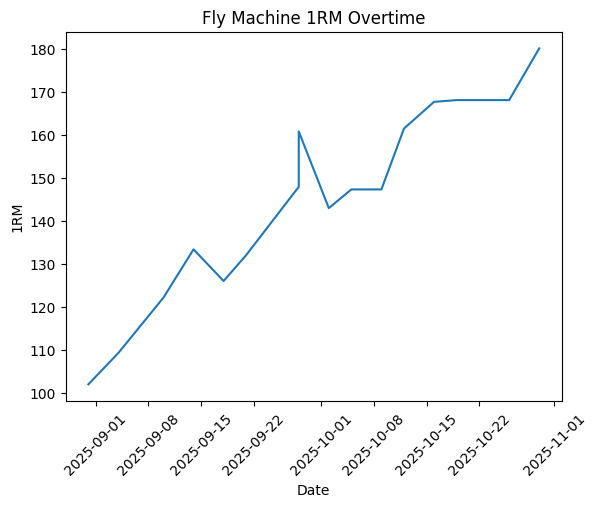

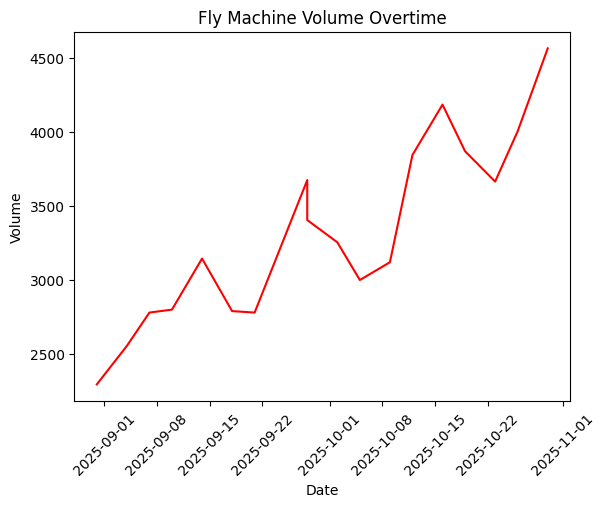

In [35]:
from IPython.display import display, HTML

def plotOneRepMax(Exercise):
    #Function to make line plot of One Rep Max vs Time for an exercise

    exerciseData = df[df["Exercise"] == Exercise]
    exerciseDataThree = exerciseData[exerciseData["Sets"] == 3]

    plt.plot(exerciseDataThree["Date"], exerciseDataThree["1RM"])
    plt.xlabel("Date")
    plt.xticks(rotation=45)  # or 90 for vertical
    plt.ylabel("1RM")
    plt.title(f"{Exercise} 1RM Overtime")
    plt.show()
    return

def plotVol(Exercise):
    #Function to make line plot of One Rep Max vs Time for an exercise

    exerciseData = df[df["Exercise"] == Exercise]
    exerciseDataThree = exerciseData[exerciseData["Sets"] == 3]

    plt.plot(exerciseDataThree["Date"], exerciseDataThree["Total Volume"], color = 'red')
    plt.xlabel("Date")
    plt.xticks(rotation=45)  # or 90 for vertical
    plt.ylabel("Volume")
    plt.title(f"{Exercise} Volume Overtime")
    plt.show()
    return

del choice

# Get unique exercise names from your DataFrame
exercises = df["Exercise"].unique()

# Print a numbered list
print("Select an exercise:")
for i, ex in enumerate(exercises, start=1):
    print(f"{i}. {ex}")

# Ask for selection
choice = int(input("Enter the number of the exercise: "))

# Get the chosen exercise
exercise_name = exercises[choice - 1]

display(HTML(f"""
<h2 style="margin-top: 20px;">You selected: <b>{exercise_name}</b></h2>
"""))

print("\n")



# Plot
plotOneRepMax(exercise_name)
plotVol(exercise_name)


# **Overall 1RM and Volume PLotter**

    Days       Date         1RM  Total Volume
0      0 2025-08-30   86.307706   2023.000000
1      1 2025-08-31   44.265294   1001.250000
2      3 2025-09-02   90.655889   1995.125000
3      5 2025-09-04   45.386819   1005.416667
4      7 2025-09-06   91.526148   2210.100000
5      8 2025-09-07   46.659636   1068.958333
6      9 2025-09-08   92.993152   2280.900000
7     11 2025-09-10   47.158944   1053.333333
8     14 2025-09-13   94.967428   2289.500000
9     15 2025-09-14   49.089400   1129.166667
10    17 2025-09-16  100.268625   2525.700000
11    19 2025-09-18   51.300551   1190.416667
12    21 2025-09-20  102.726513   2527.500000
13    22 2025-09-21   52.704212   1177.083333
14    24 2025-09-23  104.827562   2607.200000
15    28 2025-09-27   96.223294   2344.333333
16    29 2025-09-28   57.947228   1337.500000
17    31 2025-09-30   29.036005    650.000000
18    33 2025-10-02   57.039041   1253.750000
19    35 2025-10-04   97.767131   2402.083333
20    36 2025-10-05   58.091152   

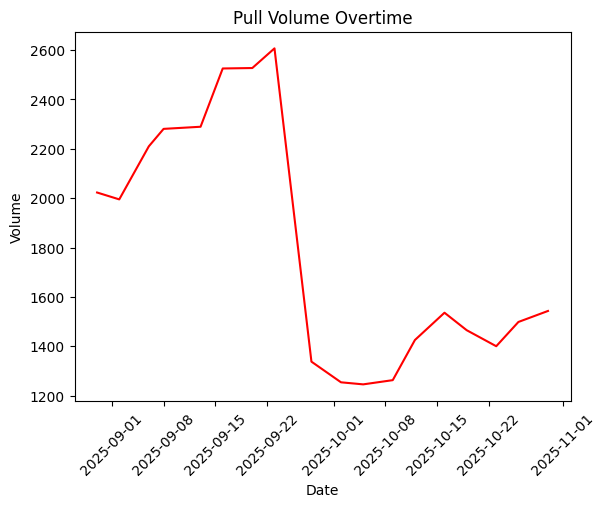

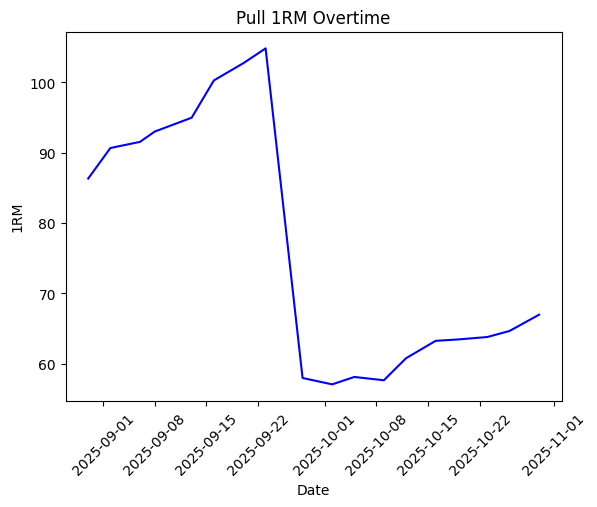

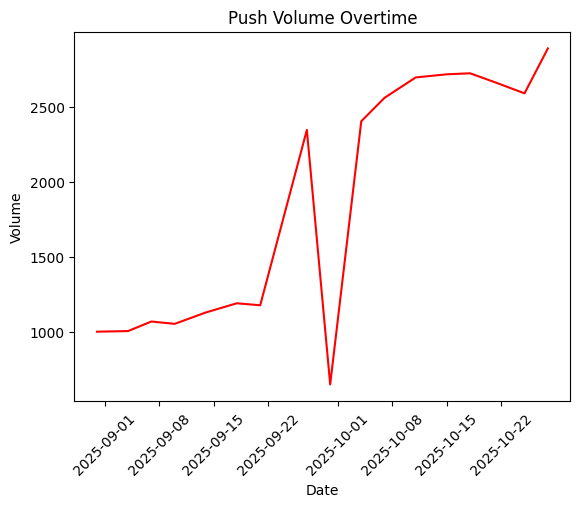

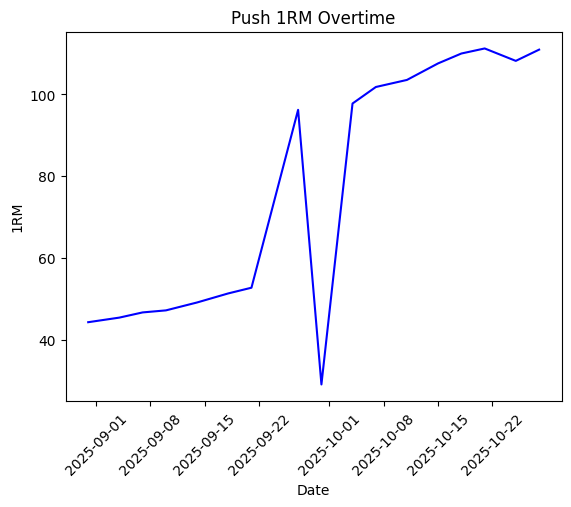

In [ ]:
exerciseData = df[df["Sets"] == 3]
# exerciseData = exerciseData[exerciseData['Exercise'] != 'Ab Machine']

average_stats = exerciseData.groupby(['Days', 'Date'], as_index=False)[['1RM', 'Total Volume']].mean()

averagePullStats = average_stats[average_stats.index % 2 == 0]
averagePushStats  = average_stats[average_stats.index % 2 != 0]

print(average_stats)


plt.plot(averagePullStats["Date"], averagePullStats["Total Volume"], color = 'red')
plt.xlabel("Date")
plt.xticks(rotation=45)  # or 90 for vertical
plt.ylabel("Volume")
plt.title("Pull Volume Overtime")
plt.show()


plt.plot(averagePullStats["Date"], averagePullStats["1RM"], color = 'blue')
plt.xlabel("Date")
plt.xticks(rotation=45)  # or 90 for vertical
plt.ylabel("1RM")
plt.title("Pull 1RM Overtime")
plt.show()


plt.plot(averagePushStats["Date"], averagePushStats["Total Volume"], color = 'red')
plt.xlabel("Date")
plt.xticks(rotation=45)  # or 90 for vertical
plt.title("Push Volume Overtime")
plt.ylabel("Volume")
plt.show()


plt.plot(averagePushStats["Date"], averagePushStats["1RM"], color = 'blue')
plt.xlabel("Date")
plt.xticks(rotation=45)  # or 90 for vertical
plt.title("Push 1RM Overtime")
plt.ylabel("1RM")
plt.show()

# **Show Progression Stats**

In [ ]:
def findCorrelation(Exercise):
    #Function that finds spearman correlation coefficent between 1RM and Time

    exerciseData = df[df["Exercise"] == Exercise]
    exerciseDataThree = exerciseData[exerciseData["Sets"] == 3]

    oneRepMax = exerciseDataThree["Weight"] / (1.0278 - ( 0.0278 * exerciseDataThree["Reps"]))

    corr, _ = spearmanr(exerciseDataThree["Days"], oneRepMax)
    return corr

def findPValue(Exercise):
    #Function that finds spearman correlation coefficent between 1RM and Time

    exerciseData = df[df["Exercise"] == Exercise]
    exerciseDataThree = exerciseData[exerciseData["Sets"] == 3]

    oneRepMax = exerciseDataThree["Weight"] / (1.0278 - (0.0278 * exerciseDataThree["Reps"]))

    _, pValue = spearmanr(exerciseDataThree["Days"], oneRepMax)
    return pValue


exerciseList = df["Exercise"].unique().tolist()


def avgPercentIncrease(Exercise):
    exerciseData = df[df["Exercise"] == Exercise]
    exerciseDataThree = exerciseData[exerciseData["Sets"] == 3]
    exerciseDataThree = exerciseDataThree.reset_index(drop=True)

    totalPercentIncrease = 0

    for index in range(1, len(exerciseDataThree)):
      percentInc = exerciseDataThree.loc[index, "1RM"]/exerciseDataThree.loc[index-1, "1RM"] * 100 - 100
      totalPercentIncrease += percentInc

    avgPercentInc = totalPercentIncrease / (len(exerciseDataThree) - 1)
    return avgPercentInc

def diff1RM(Exercise):
    exerciseData = df[df["Exercise"] == Exercise]
    exerciseDataThree = exerciseData[exerciseData["Sets"] == 3]
    exerciseDataThree = exerciseDataThree.reset_index(drop=True)

    min_index = exerciseDataThree["Days"].idxmin()
    max_index = exerciseDataThree["Days"].idxmax()
    min_1RM = exerciseDataThree.loc[min_index, "1RM"]
    max_1RM = exerciseDataThree.loc[max_index, "1RM"]

    return max_1RM - min_1RM




# Make new data frame with spearman correlation and P Values
corrValues = {
    'Exercise': exerciseList,
    'Corr': [findCorrelation(exercise) for exercise in exerciseList],
    'pValue': [findPValue(exercise) for exercise in exerciseList],
    'Avg % Inc': [avgPercentIncrease(exercise) for exercise in exerciseList],
    '1RM diff': [diff1RM(exercise) for exercise in exerciseList]
}

exerciseStats = pd.DataFrame(corrValues)

exerciseStats_sorted = exerciseStats.sort_values(by = 'Corr', ascending = True)
exerciseStats_sorted = exerciseStats_sorted.reset_index(drop=True)

totalDays = df["Days"].max()

print("Time Stats:")
print(f"{totalDays} days")
print(f"{round(totalDays/7)} weeks")
print(f"{round(totalDays/30.436875)} months \n")
print('-' * 71)
print(exerciseStats_sorted)



Time Stats:
61 days
9 weeks
2 months 

-----------------------------------------------------------------------
                 Exercise      Corr        pValue  Avg % Inc   1RM diff
0     Baysian Cable Curls  0.216991  4.028377e-01  -0.073796  -0.678157
1    Tricpe Overhead Rope  0.295526  2.338024e-01   0.203918   0.000000
2    Tricep Rope Pushdown  0.932647  1.721515e-08   2.277093  14.812001
3    Cable Lateral Raises  0.934624  1.365115e-08   4.210526   5.148354
4           Incline Press  0.935539  1.223088e-08   2.102119  17.076453
5           Lat Pull Down  0.939736  2.181951e-08   1.942423  44.828089
6          Shoulder Press  0.952462  1.129192e-09   2.359763  21.049143
7             Fly Machine  0.959629  3.125058e-10   3.559523  78.024830
8              Seated Row  0.963191  5.792433e-10   2.587062  60.222697
9       Rear Delt Machine  0.973547  5.009162e-11   2.681266  39.195936
10  Preacher Curl Machine  0.987097  2.389664e-13   3.047634  45.582029
11             Ab Machine